In [ ]:
%pip install pandas numpy openpyxl

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.9 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 60.9/60.9 kB 1.1 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.3 MB 8.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.3 MB 12.7 MB/s eta 0:00:01
   ------ --------------------------------- 1.9/11.3 MB 15.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.3 MB 18.3 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/11.3 MB 19.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.3 MB 21.9 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.3 MB 22.8 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np

# 1. Carregando os dados
try:
    df = pd.read_excel('DESAFIO_SOJA.xlsx', header=1)
    print('Arquivo DESAFIO_SOJA.xlsx carregado com sucesso!')

except FileNotFoundError:
    print('Arquivo DESAFIO_SOJA.xlsx não encontrado. Verifique o caminho e tente novamente.')
    exit()

# 2. Explorando os dados e criando a série de preços médios
datas = pd.date_range(start='2003-01', end='2023-12', freq='MS')
df.index = datas[:len(df)]

print('\n--- Dados Iniciais---')
print(df.head())

# Série de preços médios em dólares por tonelada
df['PRECO_BR'] = df['VSOJABR'] / df['QUANTBR']
print("\n--- Amostra da Nova Variável 'PRECO_BR' ---")
print(df[['PRECO_BR']].head())
print("-"*80)

# 3. Divisão da amostra em três períodos distintos
p1 = df.loc['2003-01-01':'2008-09-30']
p2 = df.loc['2008-10-01':'2020-02-29']
p3 = df.loc['2020-04-01':'2023-11-30'] 

print('\nDados divididos em três períodos:')
print(f'Período 1: {len(p1)} observações (Jan./2003 a Set./2008)')
print(f'Período 2: {len(p2)} observações (Out./2008 a Fev./2020)')
print(f'Período 3: {len(p3)} observações (Abr./2020 a Nov./2023)')
print("-"*80)

# 4. Cálculo das medidas de tendência central e dispersão
periodos = {
    'Período 1 (Jan./2003 a Set./2008)': p1,
    'Período 2 (Out./2008 a Fev./2020)': p2,
    'Período 3 (Abr./2020 a Nov./2023)': p3
}

variaveis = ['VSOJABR', 'QUANTBR', 'PSOJAINT', 'CAMBIO', 'PRECO_BR']

# Criação do loop para calcular e exibir as estatísticas para cada período
for nome_periodo, dados_periodo in periodos.items():
    print(f'\nMEDIDAS ESTATÍSTICAS - {nome_periodo}')

    resultados =[]
    for var in variaveis:
        media = dados_periodo[var].mean()
        mediana = dados_periodo[var].median()
        moda = dados_periodo[var].mode()[0]
        desvio_padrao = dados_periodo[var].std()
        variancia = dados_periodo[var].var()
        coef_variacao = (desvio_padrao / media) * 100 if media != 0 else np.nan

        resultados.append({
            'Variável': var,
            'Média': f"{media:,.2f}", 
            'Mediana': f"{mediana:,.2f}",
            'Moda': f"{moda:,.2f}",
            'Desvio Padrão': f"{desvio_padrao:,.2f}",
            'Coeficiente de Variação (%)': f"{coef_variacao:.2f}"
        })

    tabela_resultados = pd.DataFrame(resultados)
    print(tabela_resultados.to_string(index=False))
    print("-"*80)

Arquivo DESAFIO_SOJA.xlsx carregado com sucesso!

--- Dados Iniciais---
           Unnamed: 0      VSOJABR      QUANTBR    PSOJAINT  CAMBIO
2003-01-01     2003M1   50676231.0   245773.889  208.673596  3.4384
2003-02-01     2003M2   40658869.0   189292.987  209.613139  3.5908
2003-03-01     2003M3  267833468.0  1290963.377  210.222081  3.4469
2003-04-01     2003M4  589979729.0  2891576.437  221.708861  3.1187
2003-05-01     2003M5  689872764.0  3278170.259  232.412651  2.9557

--- Amostra da Nova Variável 'PRECO_BR' ---
              PRECO_BR
2003-01-01  206.190459
2003-02-01  214.793319
2003-03-01  207.467906
2003-04-01  204.033939
2003-05-01  210.444458
--------------------------------------------------------------------------------

Dados divididos em três períodos:
Período 1: 69 observações (Jan./2003 a Set./2008)
Período 2: 137 observações (Out./2008 a Fev./2020)
Período 3: 44 observações (Abr./2020 a Nov./2023)
----------------------------------------------------------------------

###  Modelo de regressão múltipla para todo o período (2003 até 2023)

In [24]:
%pip install statsmodels

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9.6 MB 20.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.6 MB 29.1 MB/s eta 0:00:01
   ------------------- -------------------- 4.6/9.6 MB 42.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 40.2 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 38.9 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.6 MB 40.3 MB/s eta 0:00:01
   ---------------------------------------  9.6/9.6 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/232.9 kB ? eta -:--:--
   ---------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import statsmodels.api as sm

print("\n###  Modelo de regressão múltipla para todo o período (2003 até 2023)" )

#Preparando as variávies para o modelo
df['ln_PRECO_BR'] = np.log(df['PRECO_BR'])
df['ln_PSOJAINT'] = np.log(df['PSOJAINT'])
df['ln_CAMBIO'] = np.log(df['CAMBIO'])

# Definindo a variável dependente e as independentes
Y = df['ln_PRECO_BR']
X = df[['ln_PSOJAINT', 'ln_CAMBIO']]

# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(X)

#Criando e treinando omodelo de Mínimos Quadrados Ordinários (MQO)
model = sm.OLS(Y, X).fit()

# Exibindo o resumo do modelo
print('\nResultados do Modelo de Transmissão de Preços:')
print(model.summary())
print("-"*80)



###  Modelo de regressão múltipla para todo o período (2003 até 2023)

Resultados do Modelo de Transmissão de Preços:
                            OLS Regression Results                            
Dep. Variable:            ln_PRECO_BR   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     638.2
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           1.61e-98
Time:                        20:25:13   Log-Likelihood:                 172.51
No. Observations:                 251   AIC:                            -339.0
Df Residuals:                     248   BIC:                            -328.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------

# Teste de White

In [30]:
#6. Teste de Heterocedasticidade (Teste de White)
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid, model.model.exog)

labels = ['Estatística LM', 'p-valor (LM)', 'Estatística F', 'p-valor (F)']
resultado_white = dict(zip(labels, white_test))

print("\n--- 6. Teste de Heterocedasticidade (teste de white) ---")
print(f"Estatística de Teste (LM): {resultado_white['Estatística LM']:.4f}")
print(f"P-valor do Teste (LM): {resultado_white['p-valor (LM)']:.4f}")
print("-" * 80)


--- 6. Teste de Heterocedasticidade (teste de white) ---
Estatística de Teste (LM): 3.4257
P-valor do Teste (LM): 0.6347
--------------------------------------------------------------------------------


### Gráfico de dispersão dos Resíduos vs. os Valores Ajustados

In [31]:
%pip install matplotlib seaborn

     ---------------------------------------- 0.0/113.8 kB ? eta -:--:--
     -------------------------------------- 113.8/113.8 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.2/8.1 MB 38.6 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.1 MB 35.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.9/8.1 MB 38.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.7/8.1 MB 39.2 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 39.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/225.2 kB ? eta -:--:--
   ---------------------------------------- 225.2/225.2 kB ? eta 0:00:00
   ------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



--- 7. Gerando Gráfico de Resíduos vs. Valores Ajustados ---
Gráfico 'residuos_vs_ajustados.png' foi salvo com sucesso na pasta do projeto!
--------------------------------------------------------------------------------


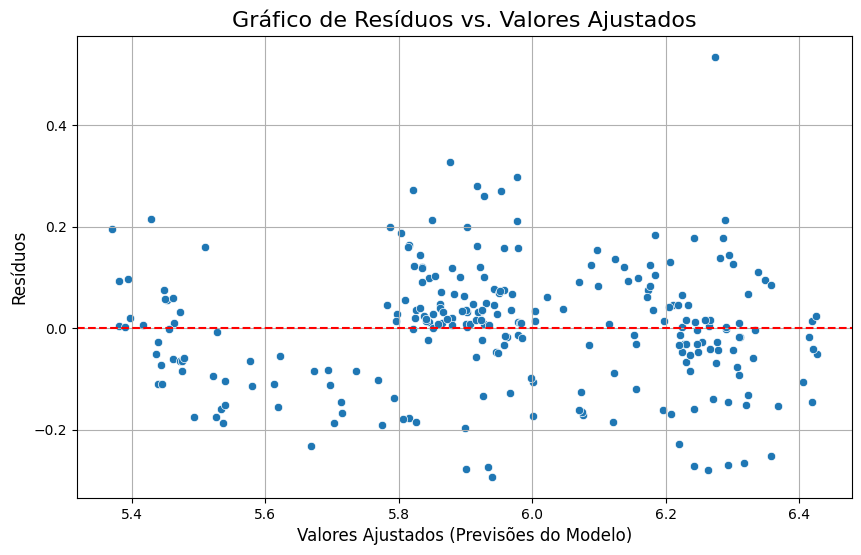

In [32]:
# Análise Gráfica de Heterocedasticidade ---
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 7. Gerando Gráfico de Resíduos vs. Valores Ajustados ---")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=model.resid)

plt.axhline(y=0, color='r', linestyle='--')

plt.title('Gráfico de Resíduos vs. Valores Ajustados', fontsize=16)
plt.xlabel('Valores Ajustados (Previsões do Modelo)', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.grid(True)

plt.savefig('residuos_vs_ajustados.png')

print("Gráfico 'residuos_vs_ajustados.png' foi salvo com sucesso na pasta do projeto!")
print("-" * 80)

# Teste de Autocorrelação (Breusch-Godfrey)

In [33]:
#8. Teste de Diagnóstico: Autocorrelação (Breusch-Godfrey)
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(model, nlags=12)

labels = ['Estatística LM', 'p-valor (LM)', 'Estatística F', 'p-valor (F)']
resultado_bg = dict(zip(labels, bg_test))

print("\n8. Teste de Breusch-Godfrey para Autocorrelação")
print(f"Estatística de Teste (LM): {resultado_bg['Estatística LM']:.4f}")
print(f"P-valor do Teste (LM): {resultado_bg['p-valor (LM)']:.4f}")
print("-" * 80)


8. Teste de Breusch-Godfrey para Autocorrelação
Estatística de Teste (LM): 167.3796
P-valor do Teste (LM): 0.0000
--------------------------------------------------------------------------------


### Função de Autocorrelação (ACF) e o da Função de Autocorrelação Parcial (PACF) dos resíduos


 9. Gerando Gráficos ACF e PACF dos Resíduos
Gráfico 'acf_pacf_residuos.png' foi salvo com sucesso na pasta do projeto!
--------------------------------------------------------------------------------


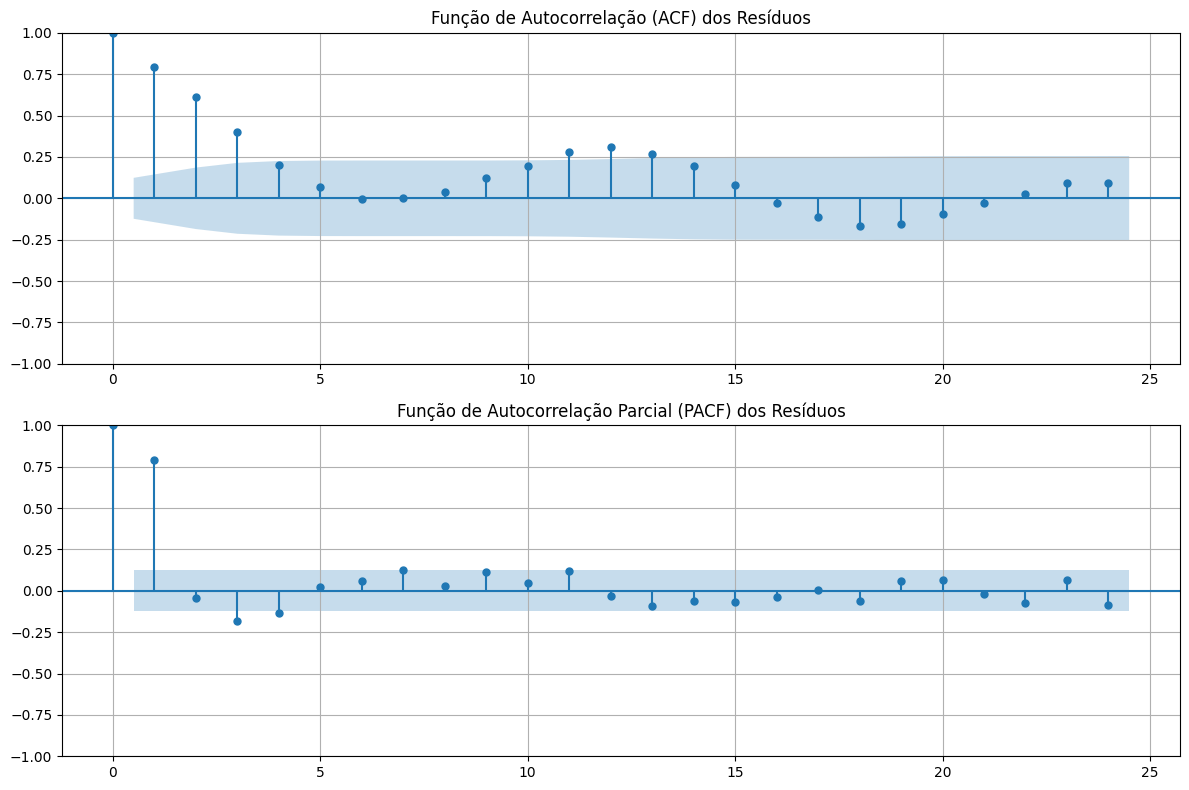

In [34]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

print("\n 9. Gerando Gráficos ACF e PACF dos Resíduos")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))


plot_acf(model.resid, lags=24, ax=ax1)
ax1.set_title('Função de Autocorrelação (ACF) dos Resíduos')
ax1.grid(True)

plot_pacf(model.resid, lags=24, ax=ax2)
ax2.set_title('Função de Autocorrelação Parcial (PACF) dos Resíduos')
ax2.grid(True)

plt.tight_layout()

plt.savefig('acf_pacf_residuos.png')

print("Gráfico 'acf_pacf_residuos.png' foi salvo com sucesso na pasta do projeto!")
print("-" * 80)